In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, adjusted_rand_score
from numpy import linalg as LA
from scipy.spatial.distance import pdist, cdist, squareform
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, cdist, squareform
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
import random
SEED = 5
random.seed(SEED)

data = load_iris()
X = data.data
y = data.target
X = X[np.where(y<2)]

In [2]:
### creating the dataset shown in the demo, using the impostor construction outlined in the paper

n = int(len(X))
C = 200000
D_squared = cdist(X,X, metric='sqeuclidean')
D_squared_impostor = D_squared + C*(np.ones((n,n)) - np.eye(n)) 
D_squared_impostor /= np.max(D_squared_impostor)
H = np.eye(n) - np.ones((n,n)) / n

X_transformed = KernelPCA(n_components=n-1, kernel='precomputed', random_state=SEED).fit_transform( - H @ D_squared_impostor @ H / 2.0 )
X_transformed.shape

(100, 99)

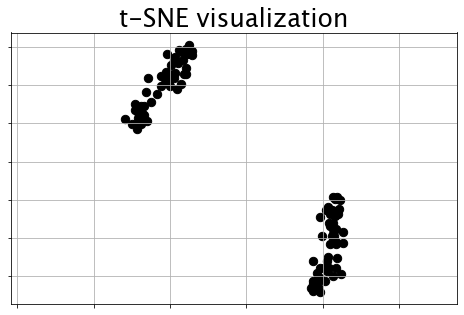

In [3]:
tsne = TSNE(n_components=2, perplexity=20, random_state=0)
X_tsne = tsne.fit_transform(X_transformed)
fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(X_tsne[:,0], X_tsne[:,1], c='black', s=70)
ax.grid('on')
ax.axis('equal')

ax.set_title('t-SNE visualization', fontsize=25)
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.savefig('visuals/0_demo/tsne_vis.png',bbox_inches='tight')


In [4]:
kmeans = KMeans(n_clusters=2, random_state=42)
y_pred_tsne = kmeans.fit_predict(X_tsne)

/Users/noahbergam/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [5]:
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from permetrics.clustering import ClusteringMetric


### SILHOUETTE SCORES
print('SILHOUETTE ON LOW-DIM tsne (w.r.t to k-means on low-dim)', silhouette_score(X_tsne, y_pred_tsne))
print('SILHOUETTE ON HIGH-DIM (w.r.t to k-means on low-dim)', silhouette_score(X_transformed, y_pred_tsne))
print('\n')
### CALINSKI-HARABASZ
print('CALINSKI ON LOW-DIM tsne (w.r.t to k-means on low-dim)', calinski_harabasz_score(X_tsne, y_pred_tsne))
print('CALINSKI ON HIGH-DIM (w.r.t to k-means on low-dim)', calinski_harabasz_score(X_transformed, y_pred_tsne))
print('\n')
### DAVIES-BOUDLIN
print('DAVIES-BOULDIN ON LOW-DIM tsne (w.r.t to k-means on low-dim)', davies_bouldin_score(X_tsne, y_pred_tsne))
print('DAVIES-BOULDIN ON HIGH-DIM (w.r.t to k-means on low-dim)', davies_bouldin_score(X_transformed, y_pred_tsne))
print('\n')
### DUNN
print('DUNN ON LOW-DIM tsne (w.r.t to k-means on low-dim)', ClusteringMetric(X=X_tsne, y_pred=y_pred_tsne).dunn_index())
print('DUNN ON HIGH-DIM (w.r.t to k-means on low-dim)', ClusteringMetric(X=X_transformed,  y_pred=y_pred_tsne).dunn_index())


SILHOUETTE ON LOW-DIM tsne (w.r.t to k-means on low-dim) 0.8389276
SILHOUETTE ON HIGH-DIM (w.r.t to k-means on low-dim) 2.5684780173654e-05


CALINSKI ON LOW-DIM tsne (w.r.t to k-means on low-dim) 1346.323404411664
CALINSKI ON HIGH-DIM (w.r.t to k-means on low-dim) 1.002568584861486


DAVIES-BOULDIN ON LOW-DIM tsne (w.r.t to k-means on low-dim) 0.24540088569504817
DAVIES-BOULDIN ON HIGH-DIM (w.r.t to k-means on low-dim) 9.886805530300528


DUNN ON LOW-DIM tsne (w.r.t to k-means on low-dim) 2.0680913151876275
DUNN ON HIGH-DIM (w.r.t to k-means on low-dim) 0.7141435642516362


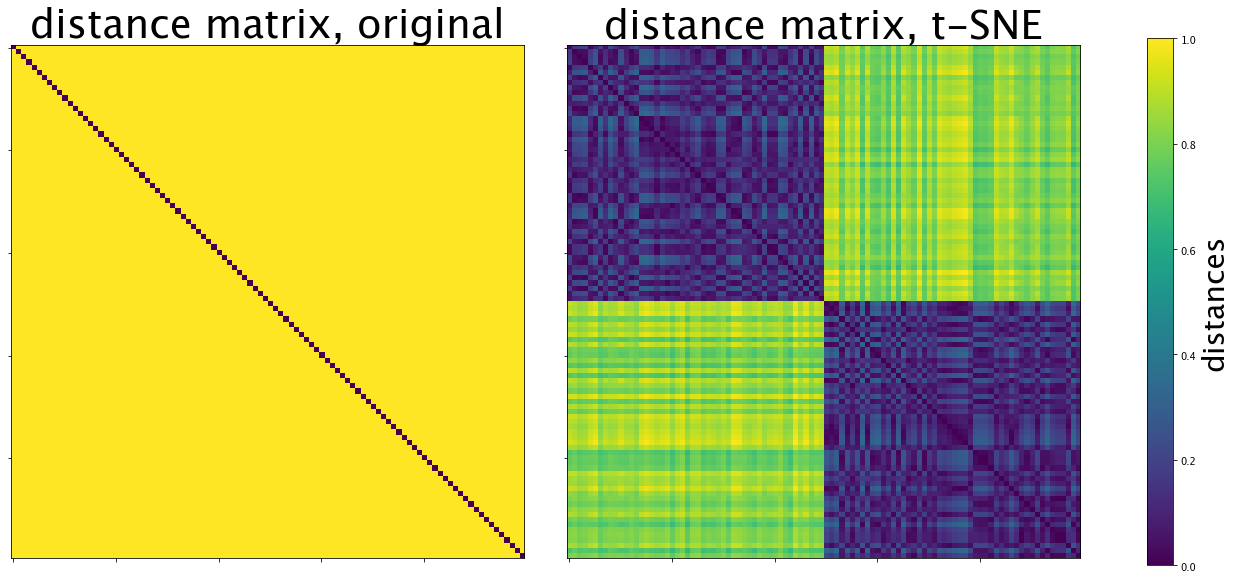

In [6]:
MAT0 = squareform(pdist(X_transformed))
MAT1 = squareform(pdist(X_tsne))
MAT0 /= np.max(MAT0)
MAT1 /= np.max(MAT1)

from scipy.cluster.hierarchy import dendrogram, linkage

fig, axs = plt.subplots(1, 2, figsize=(20, 10))


img0 = axs[0].imshow(  MAT0  )
axs[0].set_title("distance matrix, original", fontsize=40)
axs[0].set_xticklabels([]) 
axs[0].set_yticklabels([]) 

img = axs[1].imshow(  MAT1  )
axs[1].set_title("distance matrix, t-SNE", fontsize=40)
axs[1].set_xticklabels([]) 
axs[1].set_yticklabels([]) 

plt.subplots_adjust(wspace=0.4, hspace=0.5)
plt.tight_layout(pad=5.0)
cbar = fig.colorbar(img0, ax=[axs[0], axs[1]], orientation='vertical',shrink=0.85)
cbar.set_label("distances", fontsize=30)

plt.savefig('visuals/0_demo/distances_comparison.png', bbox_inches='tight')